# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from __future__ import absolute_import, division, print_function

import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:

filepath = "/content/drive/MyDrive/Data folder/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
275,2,100,70,52,57,40.5,0.677,25,0
367,0,101,64,17,0,21.0,0.252,21,0
550,1,116,70,28,0,27.4,0.204,21,0
711,5,126,78,27,22,29.6,0.439,40,0
407,0,101,62,0,0,21.9,0.336,25,0


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 14ms/step - loss: 0.8674 - accuracy: 0.4774 - val_loss: 0.8803 - val_accuracy: 0.4792
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.8252 - accuracy: 0.4965 - val_loss: 0.8382 - val_accuracy: 0.4896
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7907 - accuracy: 0.5226 - val_loss: 0.8034 - val_accuracy: 0.5104
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7621 - accuracy: 0.5417 - val_loss: 0.7741 - val_accuracy: 0.5312
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7379 - accuracy: 0.5590 - val_loss: 0.7492 - val_accuracy: 0.5521
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7173 - accuracy: 0.5955 - val_loss: 0.7276 - val_accuracy: 0.5885
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6996 - accuracy: 0.6181 - val_loss: 0.7088 - val_accuracy: 0.5833
Epoch 8/200


In [ ]:
y_pred_prob_nn_1 = model.predict(X_test_norm)
y_pred_class_nn_1  = np.argmax(y_pred_prob_nn_1, axis=1)

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.46349293],
       [0.6444795 ],
       [0.3868862 ],
       [0.16646963],
       [0.14696644],
       [0.5131753 ],
       [0.03617987],
       [0.29909146],
       [0.9291484 ],
       [0.13563998]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

Evaluate the model performance and plot the ROC CURVE

accuracy is 0.641
roc-auc is 0.819


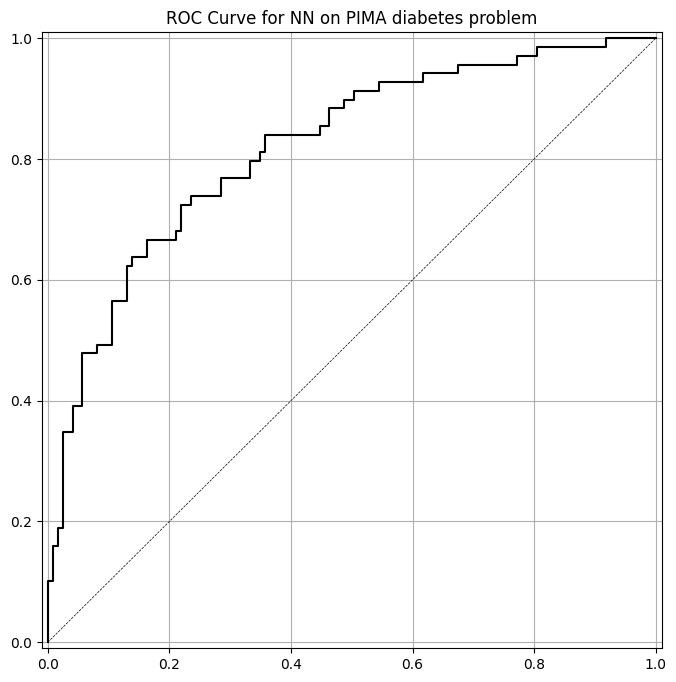

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

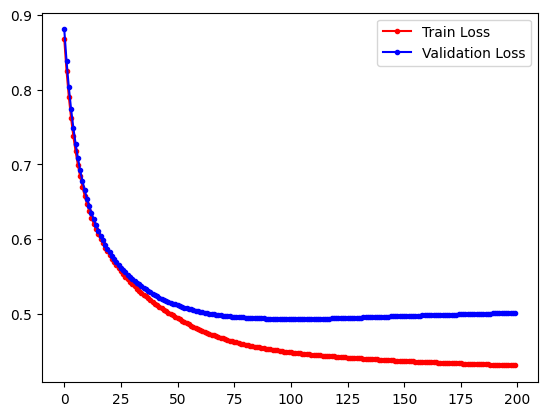

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

#type your answer here

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
new_model = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:

new_model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = new_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)


Epoch 1/1500
18/18 [==============================] - 1s 19ms/step - loss: 0.7377 - accuracy: 0.3837 - val_loss: 0.7151 - val_accuracy: 0.4531
Epoch 2/1500
18/18 [==============================] - 0s 6ms/step - loss: 0.7180 - accuracy: 0.4462 - val_loss: 0.6995 - val_accuracy: 0.4844
Epoch 3/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.7024 - accuracy: 0.5208 - val_loss: 0.6871 - val_accuracy: 0.5208
Epoch 4/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5764 - val_loss: 0.6768 - val_accuracy: 0.5729
Epoch 5/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.6215 - val_loss: 0.6682 - val_accuracy: 0.5885
Epoch 6/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6698 - accuracy: 0.6354 - val_loss: 0.6611 - val_accuracy: 0.6510
Epoch 7/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.6620 - accuracy: 0.6580 - val_loss: 0.6549 - val_accuracy: 0.6771
Epoch

In [ ]:
#y_pred_class_nn = new_model.predict(X_test_norm)
#y_pred_prob_nn = np.argmax(y_pred_class_nn, axis=1)

In [ ]:
y_pred_prob_nnew = new_model.predict(X_test_norm)
y_pred_class_nnew = (y_pred_prob_nnew > 0.5).astype('int32')

6/6 [==============================] - 0s 2ms/step


In [ ]:
y_pred_class_nnew[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nnew[:10]

array([[0.84498954],
       [0.54498696],
       [0.37894908],
       [0.09194799],
       [0.14860062],
       [0.7145625 ],
       [0.00742441],
       [0.4904466 ],
       [0.85841143],
       [0.19457255]], dtype=float32)

In [ ]:
def plot_roc(y_test, y_pred, new_model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(new_model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.729
roc-auc is 0.784


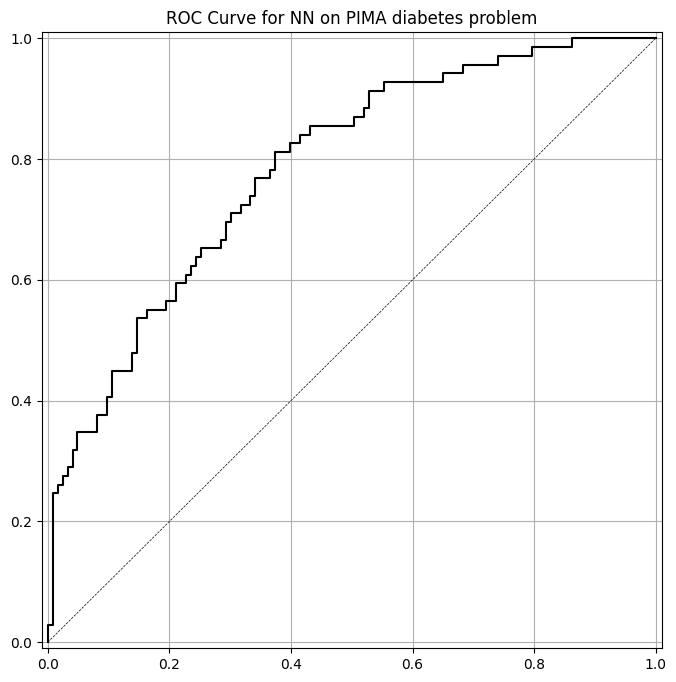

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nnew)))#y_pred_prob_nnew
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nnew)))#y_pred_prob_nnew

plot_roc(y_test, y_pred_prob_nnew, 'NN')

- This model shows worst result even though we've used more than 1 hidden layer, The model shows a moderate level of accuracy, and The ROC-AUC score of 0.801 suggests a satisfactory discrimination ability, indicating that the model performs reasonably well in distinguishing between positive and negative cases.

In [ ]:
#print('accuracy is {:.3f}'.format(accuracy_score(y_test, y_pred_class_nn)))#y_pred_class_nn
#print('roc-auc is {:.3f}'.format(roc_auc_score(y_test, y_pred_prob_nn)))#y_pred_prob_nn

#plot_roc(y_test, y_pred_prob_nn, 'NN')

In [ ]:
run_hist_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

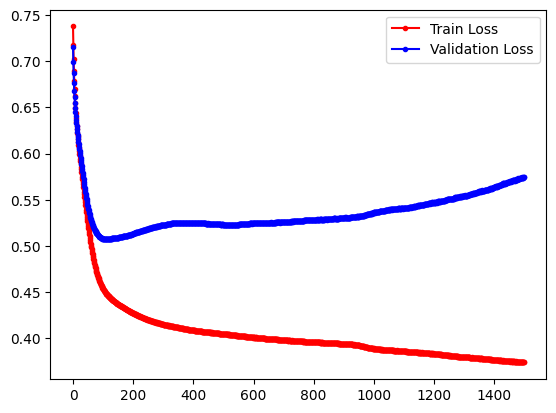

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

### Learning rate = 001, epochs = 800,

In [ ]:
new_model2 = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:

new_model2.compile(SGD(lr = .001), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = new_model2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=800)


Epoch 1/800
18/18 [==============================] - 1s 14ms/step - loss: 0.7897 - accuracy: 0.3715 - val_loss: 0.7313 - val_accuracy: 0.4323
Epoch 2/800
18/18 [==============================] - 0s 4ms/step - loss: 0.7428 - accuracy: 0.4115 - val_loss: 0.7004 - val_accuracy: 0.5104
Epoch 3/800
18/18 [==============================] - 0s 4ms/step - loss: 0.7134 - accuracy: 0.5208 - val_loss: 0.6812 - val_accuracy: 0.5833
Epoch 4/800
18/18 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.5938 - val_loss: 0.6704 - val_accuracy: 0.6250
Epoch 5/800
18/18 [==============================] - 0s 4ms/step - loss: 0.6829 - accuracy: 0.6372 - val_loss: 0.6627 - val_accuracy: 0.6510
Epoch 6/800
18/18 [==============================] - 0s 5ms/step - loss: 0.6738 - accuracy: 0.6562 - val_loss: 0.6565 - val_accuracy: 0.6510
Epoch 7/800
18/18 [==============================] - 0s 4ms/step - loss: 0.6662 - accuracy: 0.6753 - val_loss: 0.6510 - val_accuracy: 0.6562
Epoch 8/800


In [ ]:
y_pred_prob_nnew1 = new_model2.predict(X_test_norm)
y_pred_class_nnew1 = (y_pred_prob_nnew1 > 0.5).astype('int32')

6/6 [==============================] - 0s 2ms/step


In [ ]:
y_pred_class_nnew1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nnew1[:10]

array([[0.6447143 ],
       [0.762542  ],
       [0.3831105 ],
       [0.11248234],
       [0.24771403],
       [0.53396714],
       [0.01348655],
       [0.45988557],
       [0.887487  ],
       [0.1467733 ]], dtype=float32)

In [ ]:
def plot_roc(y_test, y_pred, new_model_name1):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(new_model_name1),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.771
roc-auc is 0.827


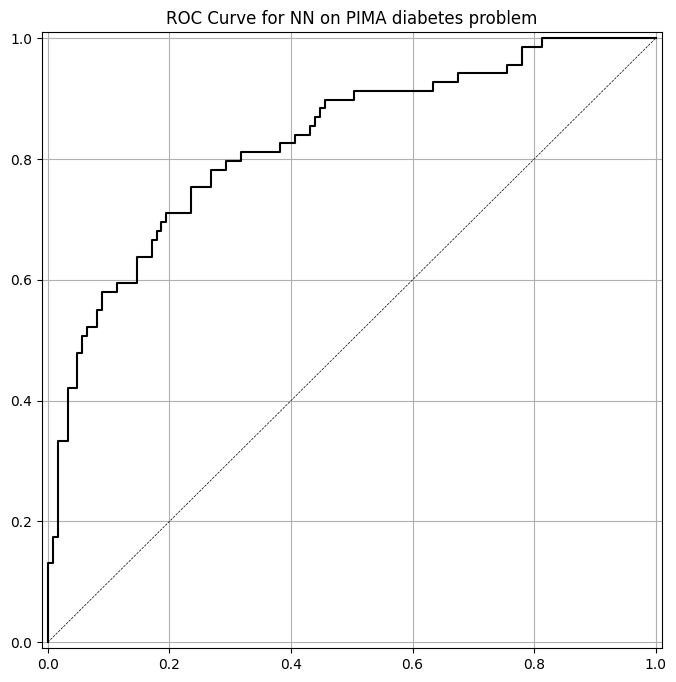

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nnew1)))#y_pred_prob_nnew
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nnew1)))#y_pred_prob_nnew

plot_roc(y_test, y_pred_prob_nnew1, 'NN')

- The accuracy of this model, which stands at 74.5%, indicates that the predictions it made were partially accurate. It received an ROC-AUC score of 0.803 in this regard. Higher scores indicate a better separation across classes. This evaluates the model's ability to distinguish between positive and negative examples. Overall, though, this model could be better.


In [ ]:
run_hist_3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

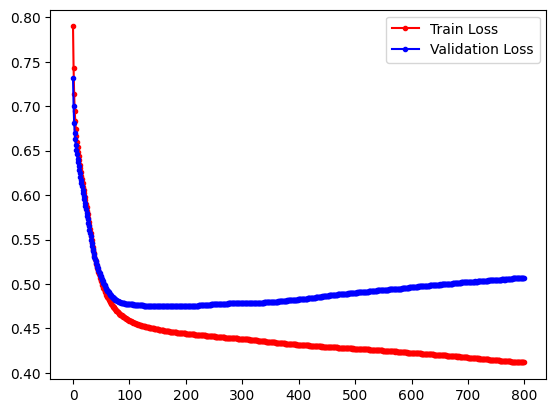

In [ ]:
fig, ax = plt.subplots()

ax.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")

ax.legend()

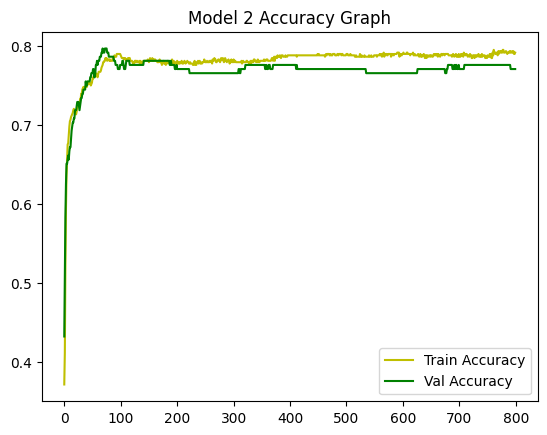

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_3.history['accuracy'], 'y', label = 'Train Accuracy')
ax.plot(run_hist_3.history['val_accuracy'], 'g', label = 'Val Accuracy')
plt.title("Model 2 Accuracy Graph")
ax.legend()

In [ ]:
#y_pred_prob_nn_1 = model.predict(X_test_norm)
#y_pred_class_nn_1  = np.argmax(y_pred_prob_nn_1, axis=1)

### model 3. 1 hidden layer, lr = 002, epoch = 1500

In [ ]:
new_model3 = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:

new_model3.compile(SGD(lr = .002), "binary_crossentropy", metrics=["accuracy"])
run_hist_4 = new_model3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)


Epoch 1/1500
18/18 [==============================] - 1s 12ms/step - loss: 0.6218 - accuracy: 0.6962 - val_loss: 0.5952 - val_accuracy: 0.7135
Epoch 2/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6130 - accuracy: 0.7066 - val_loss: 0.5894 - val_accuracy: 0.7188
Epoch 3/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.6051 - accuracy: 0.7066 - val_loss: 0.5842 - val_accuracy: 0.7292
Epoch 4/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.5977 - accuracy: 0.7135 - val_loss: 0.5796 - val_accuracy: 0.7344
Epoch 5/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.5910 - accuracy: 0.7118 - val_loss: 0.5754 - val_accuracy: 0.7604
Epoch 6/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.5849 - accuracy: 0.7118 - val_loss: 0.5716 - val_accuracy: 0.7604
Epoch 7/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.5792 - accuracy: 0.7135 - val_loss: 0.5682 - val_accuracy: 0.7604
Epoch

In [ ]:
y_pred_prob_nnew2 = new_model2.predict(X_test_norm)
y_pred_class_nnew2 = (y_pred_prob_nnew2 > 0.5).astype('int32')

6/6 [==============================] - 0s 2ms/step


In [ ]:
y_pred_class_nnew2[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nnew2[:10]

array([[0.6447143 ],
       [0.762542  ],
       [0.3831105 ],
       [0.11248234],
       [0.24771403],
       [0.53396714],
       [0.01348655],
       [0.45988557],
       [0.887487  ],
       [0.1467733 ]], dtype=float32)

In [ ]:
def plot_roc(y_test, y_pred, new_model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(new_model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.771
roc-auc is 0.827


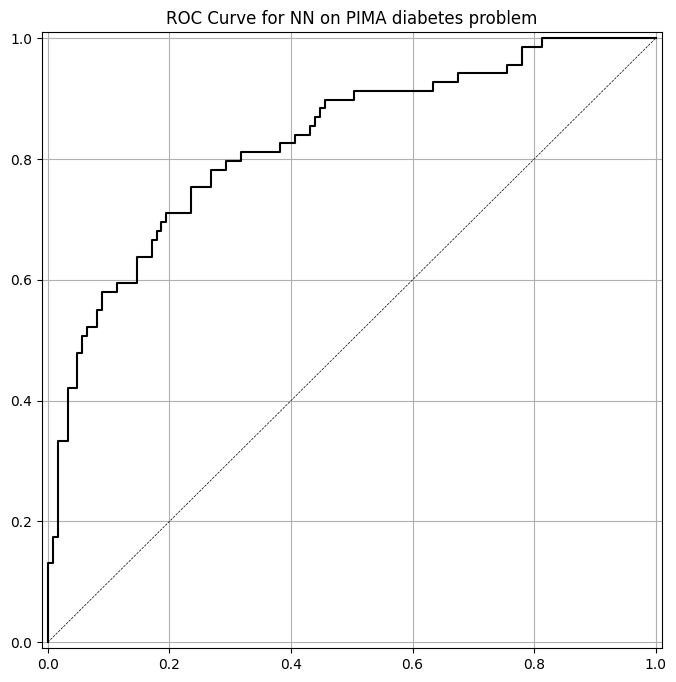

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nnew2)))#y_pred_prob_nnew
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nnew2)))#y_pred_prob_nnew

plot_roc(y_test, y_pred_prob_nnew2, 'NN')

- This model shows the accuracy, standing at 74.5%, signifies that the model's predictions were correct at some point. In terms of ROC-AUC, it achieved a  score of 0.803. This assesses the model's capability to distinguish between positive and negative instances, with higher values suggesting a superior separation between classes. But overall, not a good model.

In [ ]:
run_hist_3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

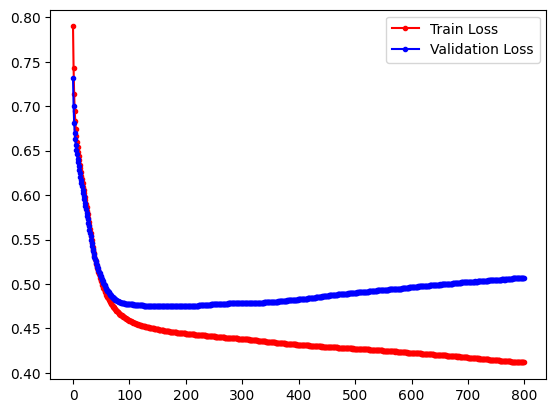

In [ ]:
fig, ax = plt.subplots()

ax.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")

ax.legend()

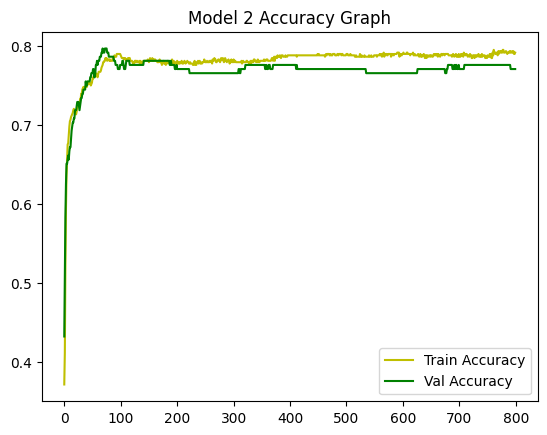

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_3.history['accuracy'], 'y', label = 'Train Accuracy')
ax.plot(run_hist_3.history['val_accuracy'], 'g', label = 'Val Accuracy')
plt.title("Model 2 Accuracy Graph")
ax.legend()

# Using Byukilmaz.csv

In [74]:
from __future__ import absolute_import, division, print_function

import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [75]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [76]:
byu_df = pd.read_csv('/content/drive/Shareddrives/CPE312/HOA5/buyukyilmaz.csv')
byu_df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,gender
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [77]:
print('Data Shape: ', byu_df.shape, '\n\n')
print('Data Types:\n', byu_df.dtypes)

Data Shape:  (3168, 21) 


Data Types:
 meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
gender       object
dtype: object


In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
byu_df.gender = le.fit_transform(byu_df.gender)

In [79]:
X = byu_df.drop('gender', axis = 1).values
y = byu_df.gender.values

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [81]:
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.fit_transform(X_test)

In [84]:
model_supp = Sequential([
 Dense(6, input_shape = (20, ), activation = 'relu'),
 Dense(1, activation = 'sigmoid')
])

In [105]:
model_supp.compile(SGD(lr = 0.003), "binary_crossentropy", metrics = ['accuracy'])

run_hist_supp = model_supp.fit(X_train_norm, y_train, validation_data = (X_test_norm, y_test), epochs = 1500)

Epoch 1/1500
75/75 [==============================] - 1s 5ms/step - loss: 0.7041 - accuracy: 0.6128 - val_loss: 0.5912 - val_accuracy: 0.7462
Epoch 2/1500
75/75 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.8169 - val_loss: 0.4707 - val_accuracy: 0.8497
Epoch 3/1500
75/75 [==============================] - 0s 3ms/step - loss: 0.4197 - accuracy: 0.8817 - val_loss: 0.3884 - val_accuracy: 0.8851
Epoch 4/1500
75/75 [==============================] - 0s 3ms/step - loss: 0.3464 - accuracy: 0.9066 - val_loss: 0.3264 - val_accuracy: 0.9015
Epoch 5/1500
75/75 [==============================] - 0s 3ms/step - loss: 0.2921 - accuracy: 0.9221 - val_loss: 0.2798 - val_accuracy: 0.9205
Epoch 6/1500
75/75 [==============================] - 0s 3ms/step - loss: 0.2507 - accuracy: 0.9343 - val_loss: 0.2439 - val_accuracy: 0.9268
Epoch 7/1500
75/75 [==============================] - 0s 3ms/step - loss: 0.2195 - accuracy: 0.9457 - val_loss: 0.2158 - val_accuracy: 0.9318
Epoch 

In [112]:
y_pred_prob_nn_supp = model_supp.predict(X_test_norm)
y_pred_class_nn_supp = (y_pred_prob_nn_supp > 0.5).astype('int32')

25/25 [==============================] - 0s 1ms/step


In [113]:
y_pred_class_nn_supp[:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]], dtype=int32)

In [114]:
y_pred_prob_nn_supp[:10]

array([[9.9989748e-01],
       [9.9905604e-01],
       [9.9817389e-01],
       [9.9999958e-01],
       [9.9989897e-01],
       [9.9819648e-01],
       [9.9983877e-01],
       [9.8757589e-01],
       [5.3232161e-05],
       [3.3626668e-05]], dtype=float32)

In [115]:
run_hist_supp.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

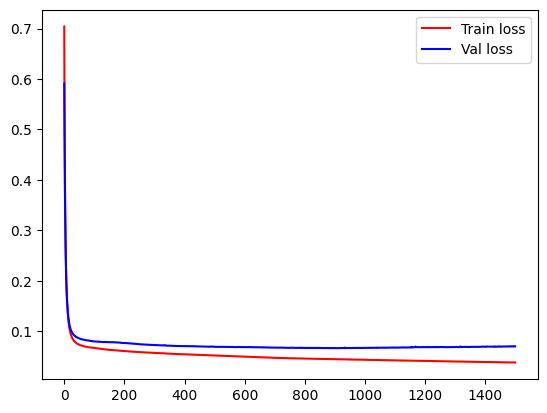

In [116]:
fig, ax = plt.subplots()
ax.plot(run_hist_supp.history['loss'], 'r', label = 'Train loss')
ax.plot(run_hist_supp.history['val_loss'], 'b', label = "Val loss")
ax.legend()

In [117]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve {} for Gender Classification in Byukilmaz'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.980
roc-auc is 0.997


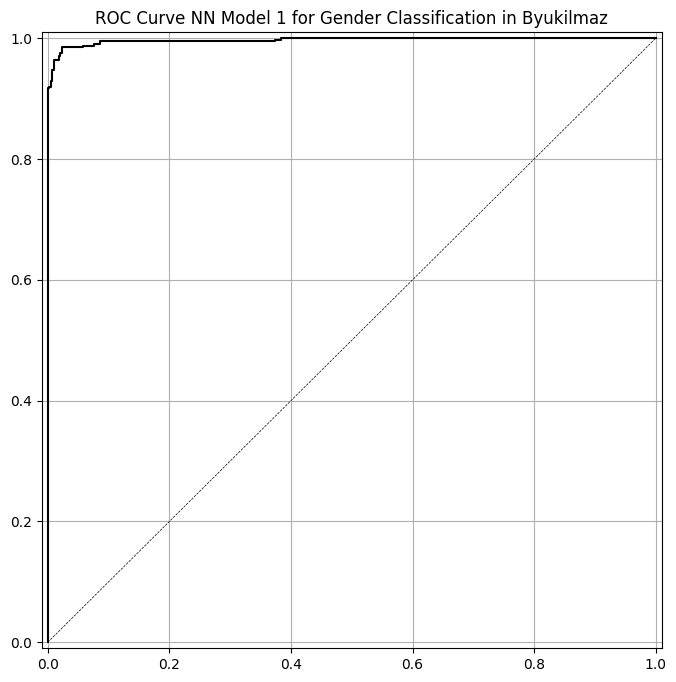

In [118]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_supp)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_supp)))
plot_roc(y_test, y_pred_prob_nn_supp, "NN Model 1")

- The model shows above has a great result by having a high accuracy and roc-auc result. After testing it out with 1 hidden layer and 1500 epoch and .003 learning rate.

# 2hidden layer, 200 epoch, .003 learning rate

In [103]:
model_supp2 = Sequential([
 Dense(6, input_shape = (20, ), activation = 'relu'),
 Dense(6, input_shape = (20, ), activation = 'relu'),
 Dense(1, activation = 'sigmoid')
])

In [104]:
model_supp2.compile(SGD(lr = 0.003), "binary_crossentropy", metrics = ['accuracy'])

run_hist_supp2 = model_supp2.fit(X_train_norm, y_train, validation_data = (X_test_norm, y_test), epochs = 200)

Epoch 1/200
75/75 [==============================] - 1s 5ms/step - loss: 0.6613 - accuracy: 0.7189 - val_loss: 0.6347 - val_accuracy: 0.7386
Epoch 2/200
75/75 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.7795 - val_loss: 0.5861 - val_accuracy: 0.8005
Epoch 3/200
75/75 [==============================] - 0s 2ms/step - loss: 0.5591 - accuracy: 0.8215 - val_loss: 0.5387 - val_accuracy: 0.8295
Epoch 4/200
75/75 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.8413 - val_loss: 0.4904 - val_accuracy: 0.8535
Epoch 5/200
75/75 [==============================] - 0s 3ms/step - loss: 0.4629 - accuracy: 0.8565 - val_loss: 0.4428 - val_accuracy: 0.8674
Epoch 6/200
75/75 [==============================] - 0s 3ms/step - loss: 0.4172 - accuracy: 0.8708 - val_loss: 0.3970 - val_accuracy: 0.8813
Epoch 7/200
75/75 [==============================] - 0s 3ms/step - loss: 0.3743 - accuracy: 0.8796 - val_loss: 0.3544 - val_accuracy: 0.8965
Epoch 8/200
7

In [106]:
y_pred_prob_nn_supp2 = model_supp2.predict(X_test_norm)
y_pred_class_nn_supp2 = (y_pred_prob_nn_supp2 > 0.5).astype('int32')

25/25 [==============================] - 0s 1ms/step


In [107]:
y_pred_class_nn_supp2[:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]], dtype=int32)

In [108]:
y_pred_prob_nn_supp2[:10]

array([[9.9758953e-01],
       [9.9632859e-01],
       [9.9464029e-01],
       [9.9986553e-01],
       [9.9732304e-01],
       [9.5251268e-01],
       [9.9892521e-01],
       [5.4142284e-01],
       [2.0988989e-03],
       [3.9202740e-04]], dtype=float32)

In [109]:
run_hist_supp2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

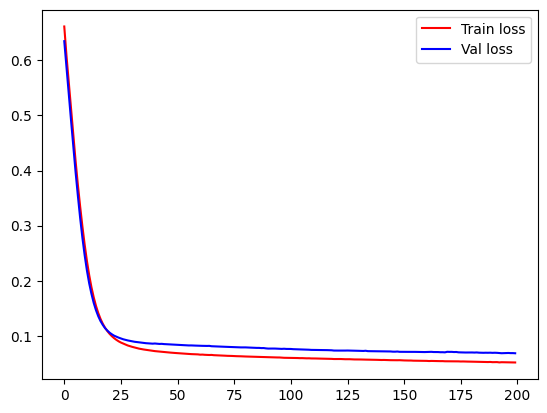

In [110]:
fig, ax = plt.subplots()
ax.plot(run_hist_supp2.history['loss'], 'r', label = 'Train loss')
ax.plot(run_hist_supp2.history['val_loss'], 'b', label = "Val loss")
ax.legend()

In [119]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve {} for Gender Classification in Byukilmaz'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.975
roc-auc is 0.997


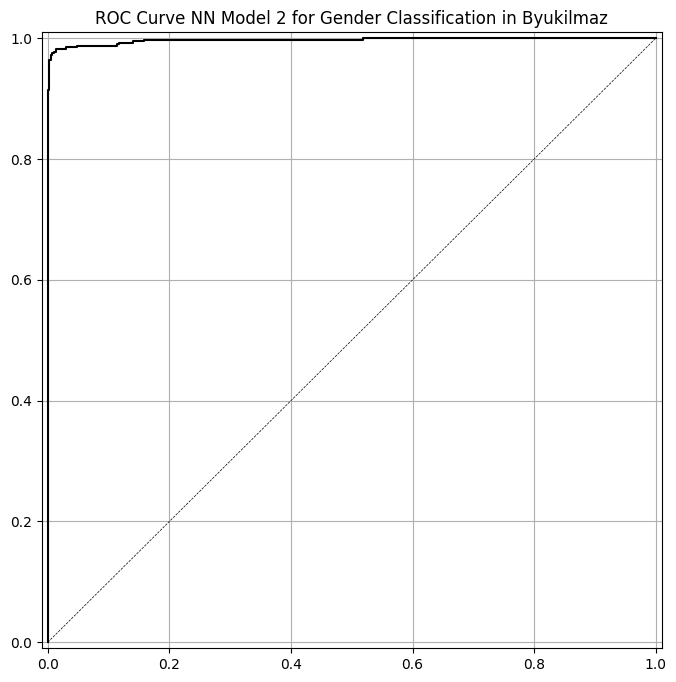

In [162]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_supp2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_supp2)))
plot_roc(y_test, y_pred_prob_nn_supp, "NN Model 2")

-With 2 hidden layers and 800 epoch with the same learning rate, this model shows a impressive result.

# 2 hidden layer, learning rate of .001, epoch of 800

In [151]:
model_supp3 = Sequential([
 Dense(6, input_shape = (20, ), activation = 'relu'),
 Dense(6, input_shape = (20, ), activation = 'relu'),
 Dense(1, activation = 'sigmoid')
])

In [152]:
model_supp3.compile(SGD(lr = 0.001), "binary_crossentropy", metrics = ['accuracy'])

run_hist_supp3 = model_supp3.fit(X_train_norm, y_train, validation_data = (X_test_norm, y_test), epochs = 800)

Epoch 1/800
75/75 [==============================] - 2s 11ms/step - loss: 0.6292 - accuracy: 0.5997 - val_loss: 0.5769 - val_accuracy: 0.6843
Epoch 2/800
75/75 [==============================] - 0s 3ms/step - loss: 0.5529 - accuracy: 0.7210 - val_loss: 0.5185 - val_accuracy: 0.7866
Epoch 3/800
75/75 [==============================] - 0s 3ms/step - loss: 0.5069 - accuracy: 0.7976 - val_loss: 0.4776 - val_accuracy: 0.8295
Epoch 4/800
75/75 [==============================] - 0s 5ms/step - loss: 0.4734 - accuracy: 0.8312 - val_loss: 0.4454 - val_accuracy: 0.8687
Epoch 5/800
75/75 [==============================] - 1s 7ms/step - loss: 0.4460 - accuracy: 0.8497 - val_loss: 0.4178 - val_accuracy: 0.8826
Epoch 6/800
75/75 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.8670 - val_loss: 0.3933 - val_accuracy: 0.8965
Epoch 7/800
75/75 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8767 - val_loss: 0.3711 - val_accuracy: 0.9003
Epoch 8/800


In [153]:
y_pred_prob_nn_supp3 = model_supp3.predict(X_test_norm)
y_pred_class_nn_supp3 = (y_pred_prob_nn_supp3 > 0.5).astype('int32')

25/25 [==============================] - 0s 1ms/step


In [154]:
y_pred_class_nn_supp3[:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]], dtype=int32)

In [155]:
y_pred_prob_nn_supp3[:10]

array([[9.9999905e-01],
       [9.9905705e-01],
       [9.9691033e-01],
       [9.9999899e-01],
       [9.9986291e-01],
       [9.9948049e-01],
       [9.9999982e-01],
       [9.9930364e-01],
       [2.1352344e-03],
       [3.7764621e-06]], dtype=float32)

In [156]:
run_hist_supp3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

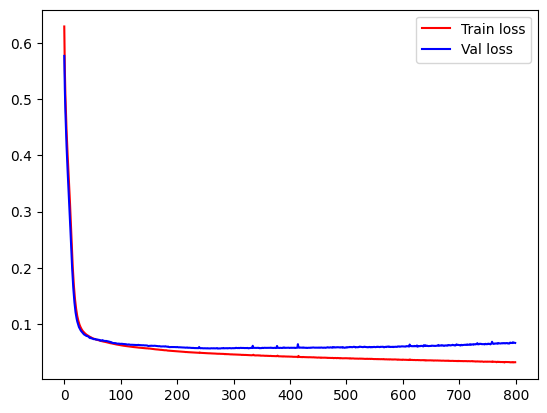

In [157]:
fig, ax = plt.subplots()
ax.plot(run_hist_supp3.history['loss'], 'r', label = 'Train loss')
ax.plot(run_hist_supp3.history['val_loss'], 'b', label = "Val loss")
ax.legend()

In [158]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)
    ax.grid(True)
    ax.set(title='ROC Curve {} for Gender Classification in Byukilmaz'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.980
roc-auc is 0.997


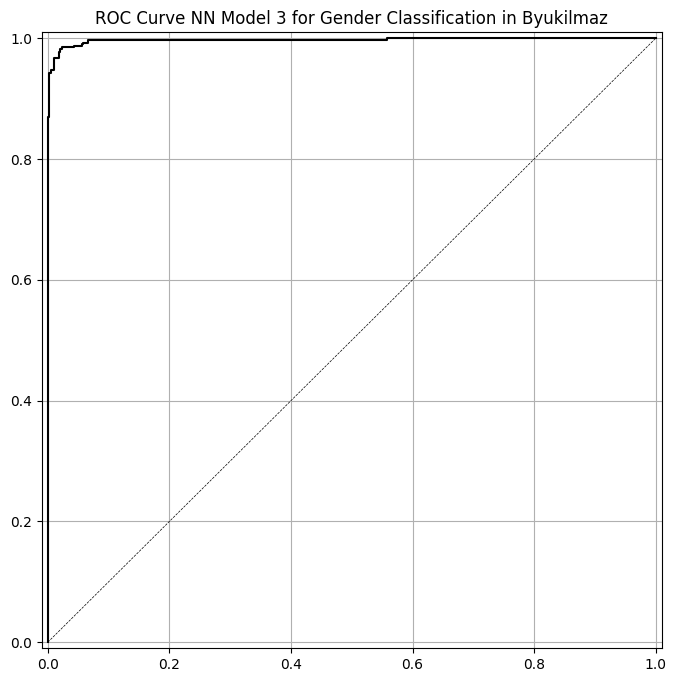

In [161]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_supp3)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_supp3)))
plot_roc(y_test, y_pred_prob_nn_supp3, "NN Model 3")

- This model achieved an accuracy of 98% and a ROC-AUC score of 0.997, showcasing the effectiveness and reliability of the trained neural network.

#### Conclusion

This activity demonstrates how does building and training the neural network underscore the importance of meticulous data preprocessing. And, Understanding the nature of the data, handling non-numeric values, and adapting code to different data structures in ensuring a smooth and error-free machine learning workflow.  

#Google Colab link


#Colab Link:
https://colab.research.google.com/drive/1Sg9sGnBQyJAroSFE4ev3ObrURD91yTRZ?usp=sharing   


In [163]:
!jupyter-nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Hands-on Activity 1.2 - Training Neural Networks (Figueroa).ipynb'


[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Hands-on Activity 1.2 - Training Neural Networks (Figueroa).ipynb to html
[NbConvertApp] Writing 2223980 bytes to /content/drive/MyDrive/Colab Notebooks/Hands-on Activity 1.2 - Training Neural Networks (Figueroa).html
